In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

![](https://etimg.etb2bimg.com/photo/78036515.cms)

[](https://etimg.etb2bimg.com/photo/78036515.cms)

**Read the data**

In [70]:
df = pd.read_csv('./ML.NET Sample Code/Housing.csv') # import data from kaggle input

**Dispay some rows**

In [73]:
df.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# change all "yes" value on mainroad, guestroom, basement, hotwaterheating, airconditioning, and prefarea from "yes" to 1 and "no" to 0
bool_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in bool_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

**view the number of rows and columns in the data**

In [5]:
df.shape # getting the count of rows and columns in the dataframe

(545, 13)

**view summary statistics**

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**view summary statistics**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Look if there are any duplicate rows in the dataset**

In [8]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


No duplicate row

**Get the name of the columns**

In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Check for null values**

In [10]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No missing values

**Let's do a lil bit of EDA !**

![](https://sphero.com/cdn/shop/articles/data-visualization-header-black_1200x.png?v=1674511334)

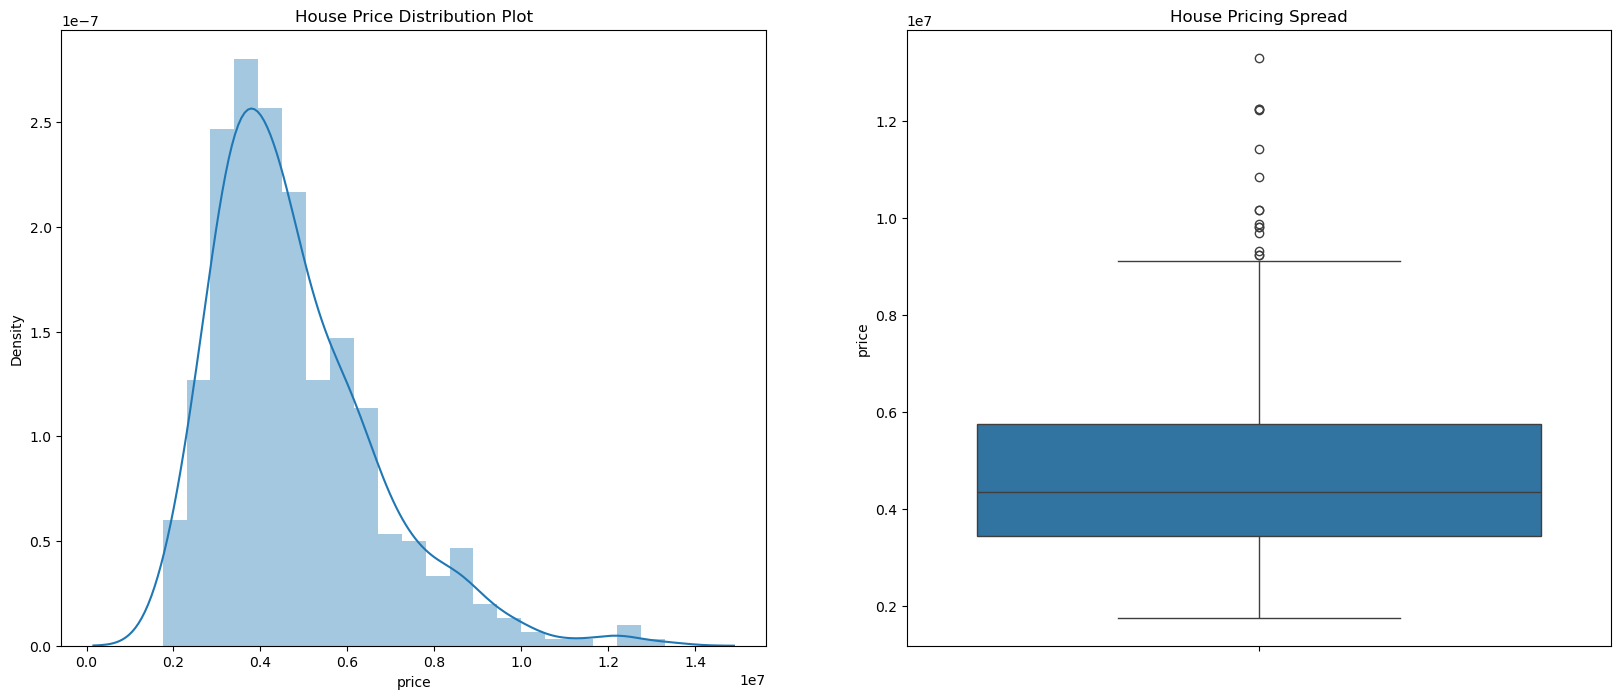

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

In [12]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
85%      6.615000e+06
90%      7.350000e+06
100%     1.330000e+07
max      1.330000e+07
Name: price, dtype: float64


Inference :
The plot seemed to be right-skewed mildly.
There is a slight difference between the mean and the median of the price distribution.


**Visualising Categorical Data**

In [13]:
categorical_list = [x for x in df.columns if df[x].dtype =='object']

In [14]:
for x in categorical_list: print(x)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


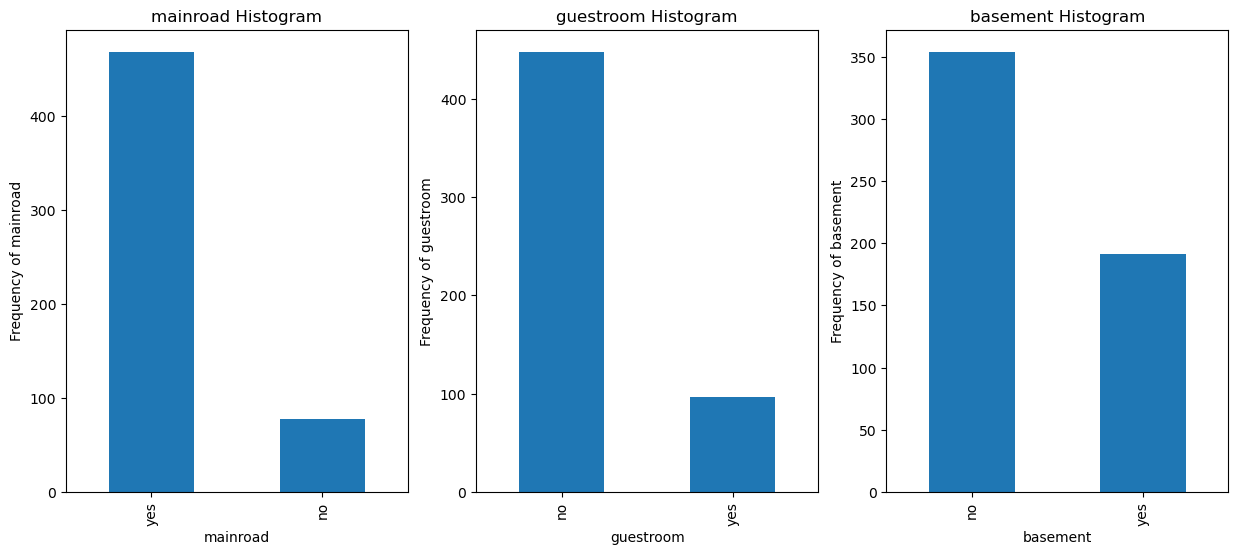

In [15]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histogram')
plt1.set(xlabel = 'mainroad', ylabel='Frequency of mainroad')

plt.subplot(1,3,2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histogram')
plt1.set(xlabel = 'guestroom', ylabel='Frequency of guestroom')

plt.subplot(1,3,3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histogram')
plt1.set(xlabel = 'basement', ylabel='Frequency of basement')

plt.show()

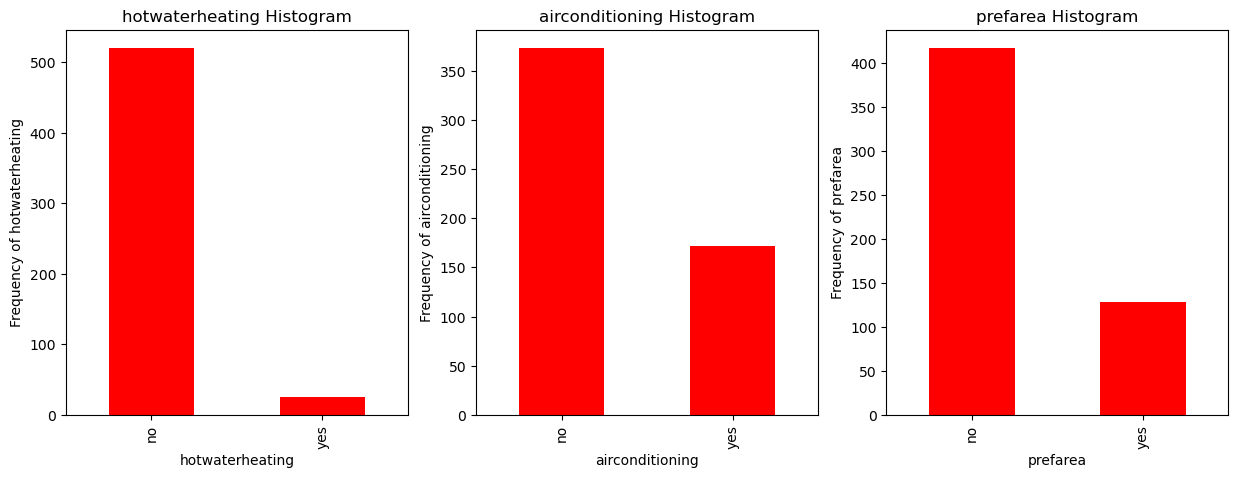

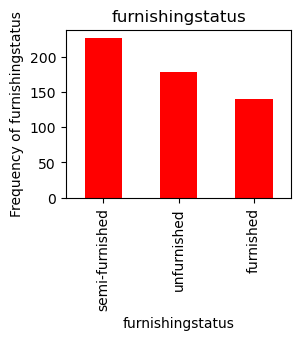

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar',color='r')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frequency of hotwaterheating')

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frequency of furnishingstatus')
plt.show()

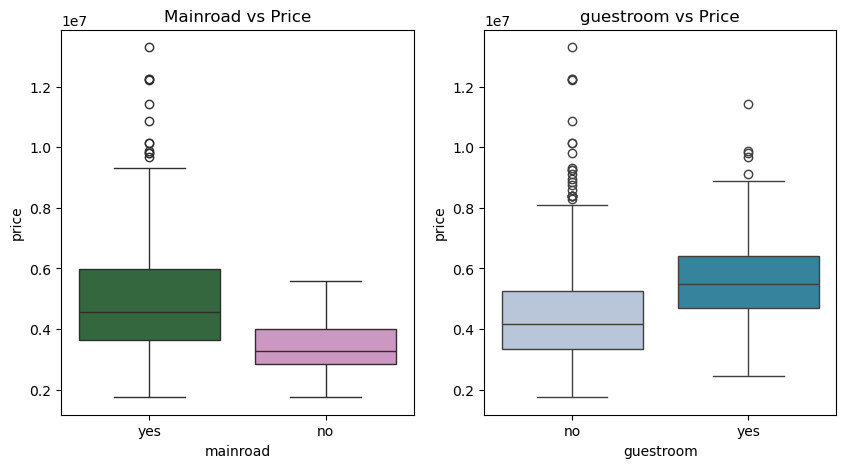

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Mainroad vs Price')
sns.boxplot(x=df.mainroad, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('guestroom vs Price')
sns.boxplot(x=df.guestroom, y=df.price, palette=("PuBuGn"))

plt.show()

Infrence - having a mainroad and having a guestroom supply have corelation with price.

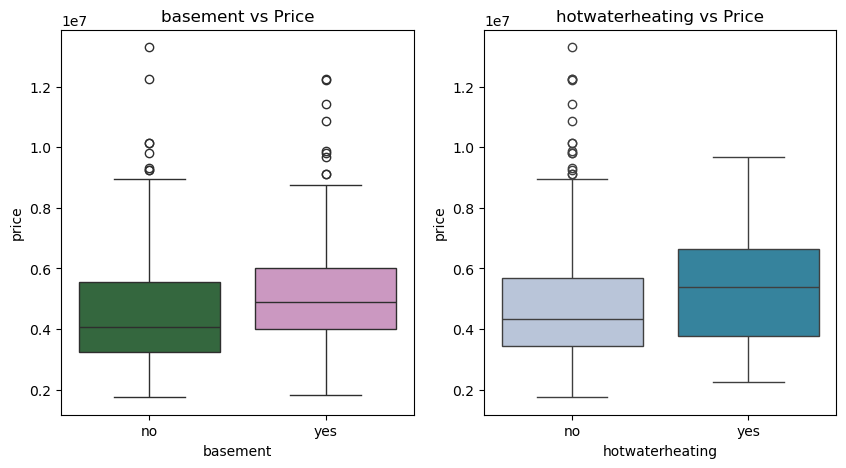

In [18]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('basement vs Price')
sns.boxplot(x=df.basement, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('hotwaterheating vs Price')
sns.boxplot(x=df.hotwaterheating, y=df.price, palette=("PuBuGn"))

plt.show()

Infrence - having a basement and having a hotwarer supply have slight corelation with price.

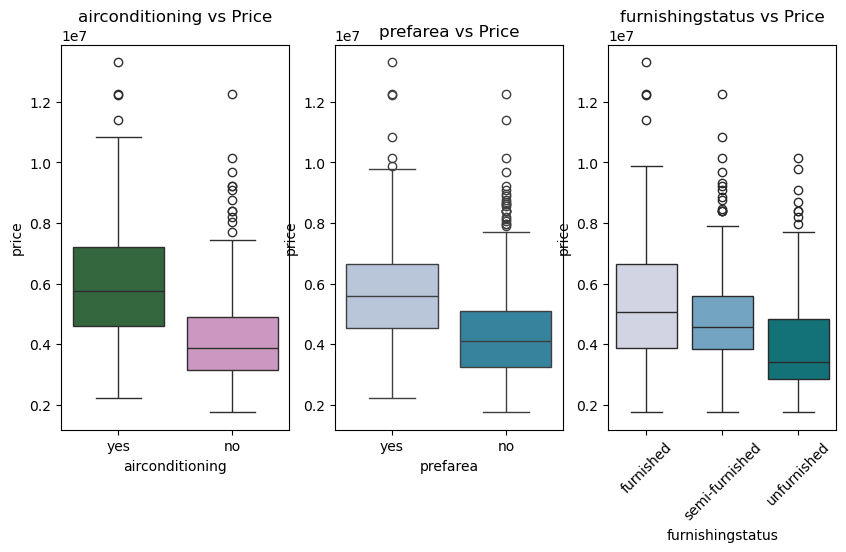

In [19]:

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title('airconditioning vs Price')
sns.boxplot(x=df.airconditioning, y=df.price, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('prefarea vs Price')
sns.boxplot(x=df.prefarea, y=df.price, palette=("PuBuGn"))

plt.subplot(1,3,3)
plt.title('furnishingstatus vs Price')
sns.boxplot(x=df.furnishingstatus, y=df.price, palette=("PuBuGn"))
plt.xticks(rotation=45)

plt.show()



Infrence - having aircondition and prefarea have positive corealtion with Price of the house. Also a furnished house would have higher price.

**Visualising numerical data**

In [40]:
numerical_list = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_list)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


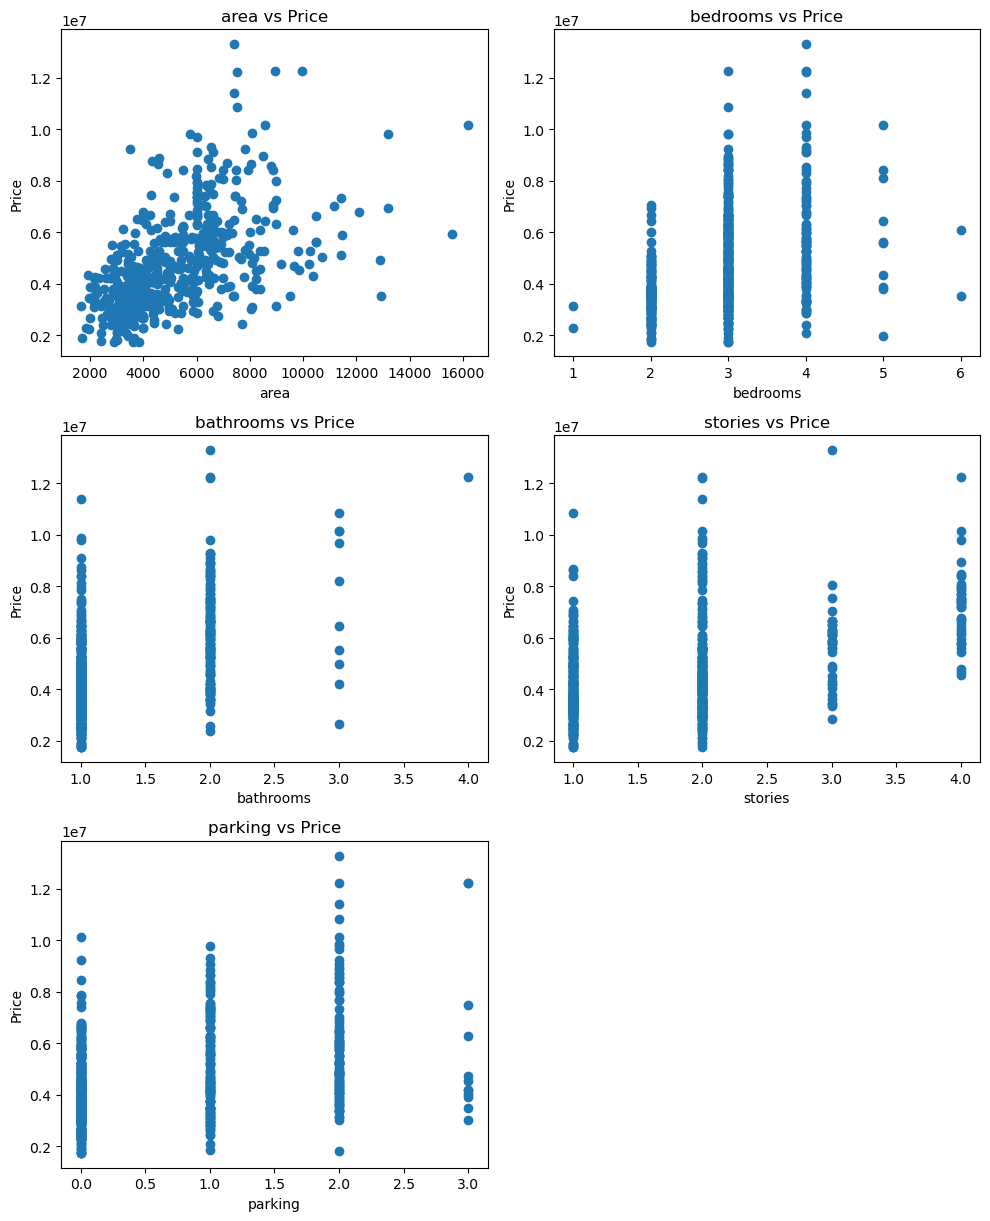

In [41]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

Inference - Area has a strong positive corealtion with Price

In [45]:
sns.pairplot(df)
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (545, 6) instead

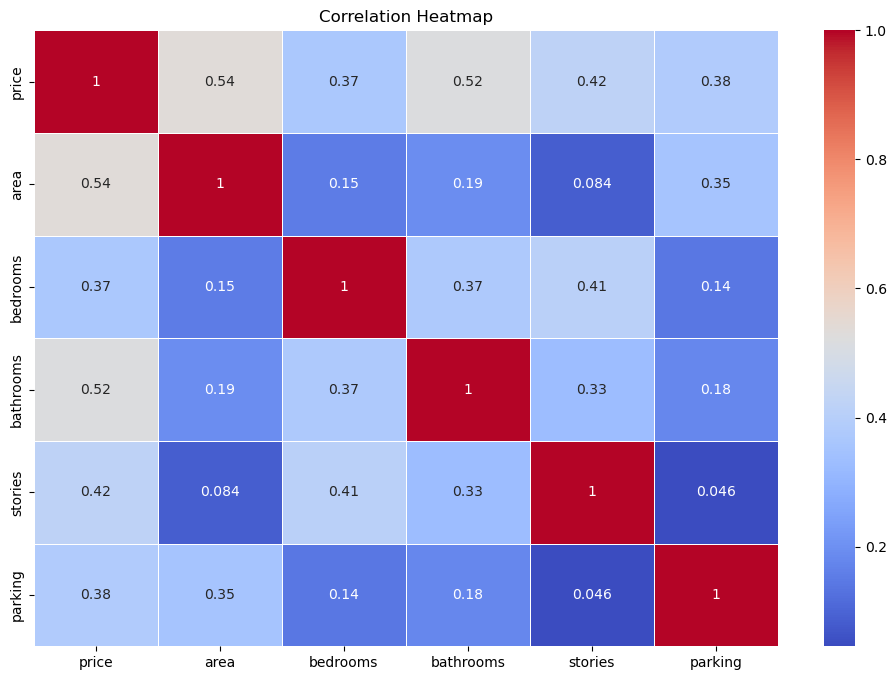

In [46]:
cor_matrix= df[numerical_list].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Dummy Variables

In [47]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True).astype(int)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df

df = dummies('mainroad',df)
df = dummies('guestroom',df)
df = dummies('hotwaterheating',df)
df = dummies('basement',df)
df = dummies('airconditioning',df)
df = dummies('prefarea',df)
df = dummies('furnishingstatus',df)

KeyError: 'mainroad'

In [48]:
df.tail()

,price,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,yes,semi-furnished,unfurnished
540,1820000,3000,2,1,1,2,1,0,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,0,1,0,0,0,0,0,0,1


In [49]:
df.shape

(545, 14)

In [50]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[numerical_list] = scaler.fit_transform(df_train[numerical_list])

In [52]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,yes,semi-furnished,unfurnished
333,0.187879,0.102429,0.4,0.0,0.333333,0.000000,1,0,0,0,0,0,1,0
429,0.136364,0.258624,0.6,0.0,0.333333,0.000000,1,0,0,0,0,0,0,1
18,0.618182,0.243224,0.4,0.5,0.333333,0.666667,1,1,0,0,1,0,0,0
480,0.103030,0.144667,0.4,0.0,0.333333,0.333333,0,0,0,0,0,0,1,0
505,0.078182,0.190426,0.4,0.0,0.333333,0.000000,1,0,0,0,1,0,0,1


In [53]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [54]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

![](https://dataunbox.com/wp-content/uploads/2020/06/model_building-800x445.png)

In [55]:
#lm = LinearRegression()
#lm.fit(X_train,y_train)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('parking', True, 1),
 ('yes', True, 1),
 ('yes', True, 1),
 ('yes', True, 1),
 ('yes', False, 3),
 ('yes', True, 1),
 ('yes', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [57]:
X_train.columns[rfe.support_]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'yes', 'yes',
       'yes', 'yes', 'yes'],
      dtype='object')

In [58]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
333,0.102429,0.4,0.0,0.333333,0.000000,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
429,0.258624,0.6,0.0,0.333333,0.000000,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18,0.243224,0.4,0.5,0.333333,0.666667,1,1,0,0,1,...,0,0,1,0,1,1,0,0,1,0
480,0.144667,0.4,0.0,0.333333,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505,0.190426,0.4,0.0,0.333333,0.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [59]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant for intercept
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

MODEL 1

In [60]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     69.41
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           2.81e-85
Time:                        18:43:27   Log-Likelihood:                 396.09
No. Observations:                 408   AIC:                            -768.2
Df Residuals:                     396   BIC:                            -720.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.018      0.185      0.8

Dropping Bedrooms column as it has p values much greater than significant value of 0.05

In [61]:
X_train_new = X_train_new.drop(["bedrooms"], axis = 1)

Model 2

In [62]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     76.05
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           7.27e-86
Time:                        18:43:32   Log-Likelihood:                 395.21
No. Observations:                 408   AIC:                            -768.4
Df Residuals:                     397   BIC:                            -724.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0183      0.014      1.332      0.1

In [63]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
17,yes,inf
26,yes,inf
20,yes,inf
21,yes,inf
22,yes,inf
23,yes,inf
24,yes,inf
25,yes,inf
27,yes,inf
18,yes,inf


Dropping the 'Yes' dummies column due to very high vif scores

In [64]:
X_train_new = X_train_new.drop(["yes"], axis = 1)

Model 3

In [65]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           2.50e-68
Time:                        18:43:36   Log-Likelihood:                 339.28
No. Observations:                 408   AIC:                            -668.6
Df Residuals:                     403   BIC:                            -648.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.011      6.657      0.0

In [66]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,4.25
1,area,1.18
4,parking,1.17
2,bathrooms,1.14
3,stories,1.11


Model is ready lets verify the model through Residual Analysis

In [67]:
lm = sm.OLS(y_train,X_train_new).fit()

y_train_price = lm.predict(X_train_new)

![](https://www.investopedia.com/thmb/huV5SWrTX413a8tUUYI9igEDYMM=/750x0/filters:no_upscale():max_bytes(150000):strip_icc()/ErrorTerm-FINAL-4d315aae597e449da2689c8d5e363300.png)

Text(0.5, 0, 'Errors')

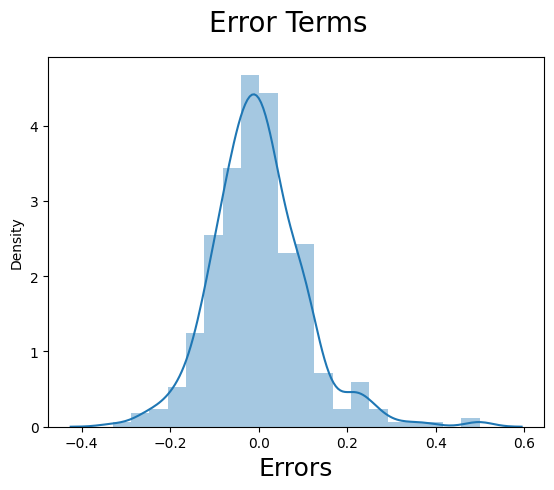

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

Error terms are approximately following a normal distribution. so we satisfy one assumption of linear regression

**Predicting on the Test set**

In [45]:
# the test set numerical values scaled
df_test[numerical_list] = scaler.fit_transform(df_test[numerical_list])

In [46]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [47]:
# selecting the choosen features from the train set to the test set
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [48]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [49]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.46127039829127103

Text(0, 0.5, 'y_pred')

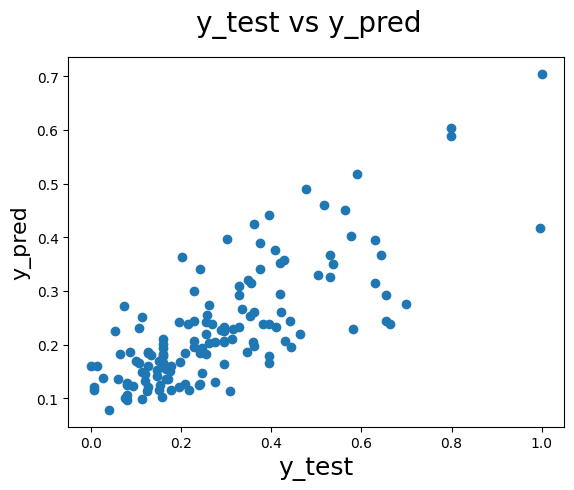

In [50]:
#EVALUATION OF THE MODEL
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [51]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     122.6
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.50e-68
Time:                        15:56:14   Log-Likelihood:                 339.28
No. Observations:                 408   AIC:                            -668.6
Df Residuals:                     403   BIC:                            -648.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.011      6.657      0.0

Inference :
R-sqaured and Adjusted R-squared (extent of fit) - 0.549 and 0.544 - 54% variance explained.
p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.